In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS
Objective:
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset. 
Dataset:
The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.
Part 1: Data Preparation and Exploration
1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.
Part 2: Model Building - ARIMA
1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.
Part 3: Model Building - Exponential Smoothing
1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.
Part 4: Evaluation and Comparison
1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.
Deliverables:
•	Include visualizations and explanations for the choices and findings at each step.
•	Well-commented Python code that used to conduct the analysis and build the models.
Assessment Criteria:
•	Accuracy and completeness of the data preparation and exploration steps.
•	Justification for model selection and parameter tuning decisions.
•	Clarity and depth of the analysis in the diagnostics and model evaluation stages.
This assignment offers a hands-on experience with real-world data, applying sophisticated time series forecasting methods to predict future currency exchange rates.


In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (30,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

In [5]:
df = pd.read_csv('exchange_rate.csv', index_col=0, parse_dates=True)
df

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [7]:
df['Ex_rate']

date
01-01-1990 00:00    0.785500
02-01-1990 00:00    0.781800
03-01-1990 00:00    0.786700
04-01-1990 00:00    0.786000
05-01-1990 00:00    0.784900
                      ...   
06-10-2010 00:00    0.718494
07-10-2010 00:00    0.721839
08-10-2010 00:00    0.723197
09-10-2010 00:00    0.720825
10-10-2010 00:00    0.720825
Name: Ex_rate, Length: 7588, dtype: float64

In [5]:
#Data visualization with the help of the line plot

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x="date",y="Ex_rate",data=df)

<Axes: xlabel='date', ylabel='Ex_rate'>

<Axes: xlabel='date'>

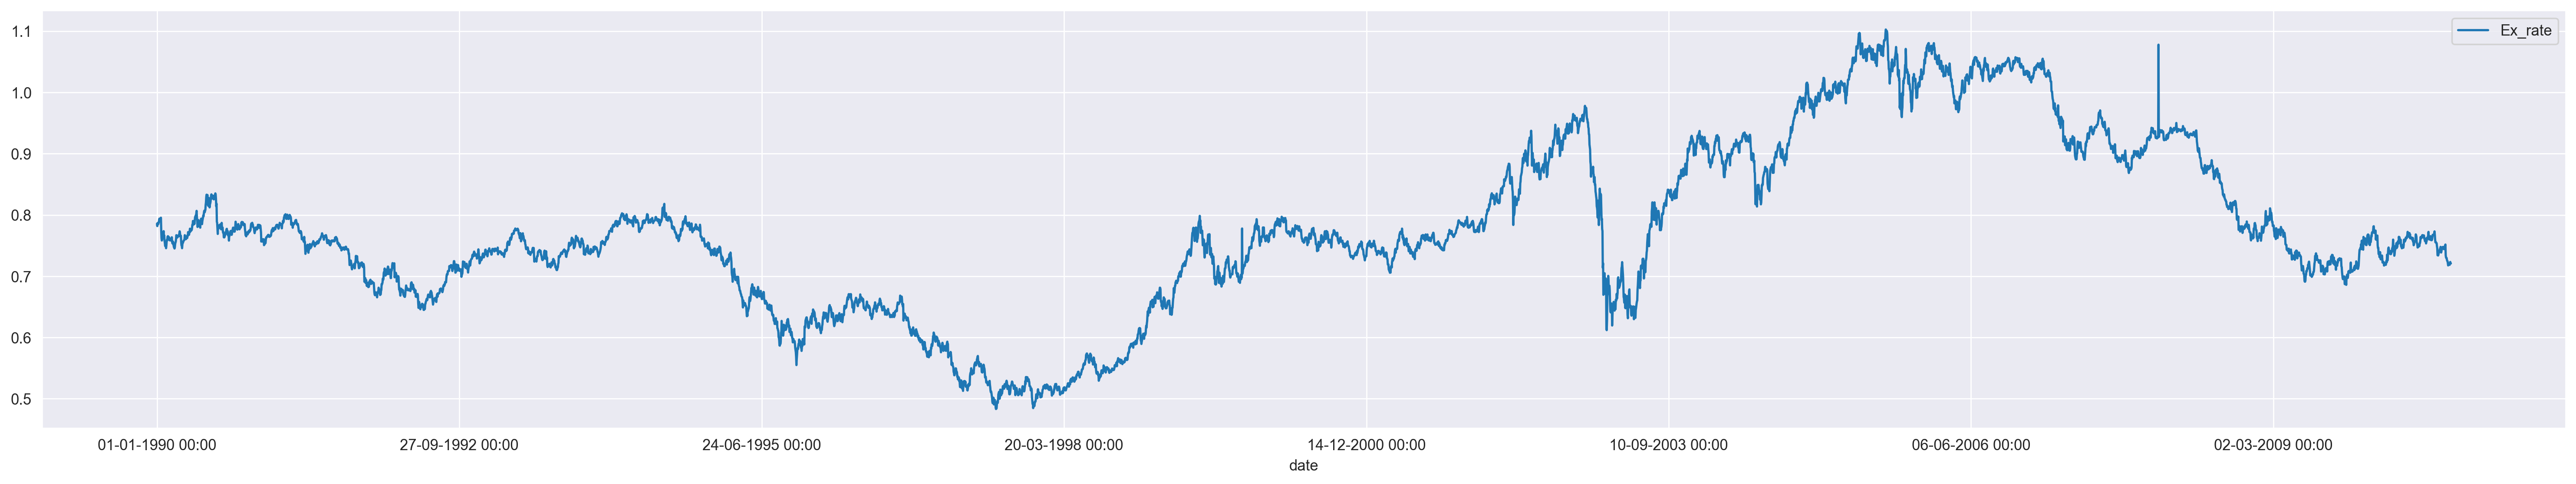

In [7]:
df.plot()

<Axes: xlabel='date'>

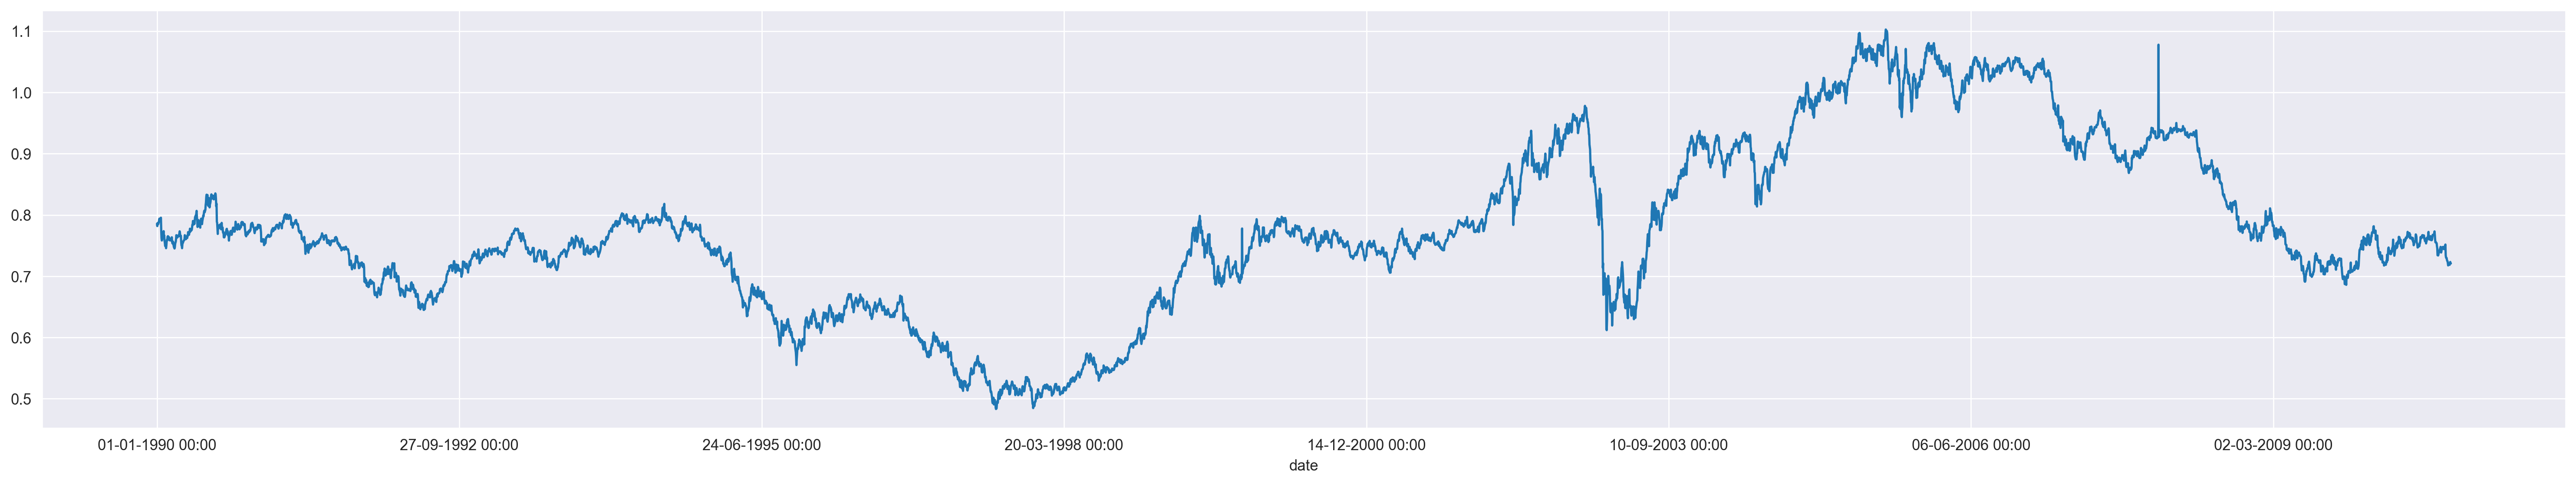

In [8]:
df['Ex_rate'].plot()

In [9]:
adfuller(df['Ex_rate'])[1]

0.44923273535983155

In [10]:
order = auto_arima(df['Ex_rate'])

In [11]:
order

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [12]:
df.shape

(7588, 1)

In [13]:
train = df.iloc[:-30]
test = df.iloc[-30:]

In [14]:
train.shape

(7558, 1)

In [15]:
train

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-09-2010 00:00,0.747831
07-09-2010 00:00,0.746436
08-09-2010 00:00,0.738662


In [16]:
test.shape

(30, 1)

In [17]:
model = ARIMA(train['Ex_rate'], order=(1, 0, 5)).fit()

In [18]:
test

,Ex_rate
date,
11-09-2010 00:00,0.745796
12-09-2010 00:00,0.745045
13-09-2010 00:00,0.747692
14-09-2010 00:00,0.745601
15-09-2010 00:00,0.747680
16-09-2010 00:00,0.744602
17-09-2010 00:00,0.744158
18-09-2010 00:00,0.745184
19-09-2010 00:00,0.744990


In [19]:
train.tail()

,Ex_rate
date,
06-09-2010 00:00,0.747831
07-09-2010 00:00,0.746436
08-09-2010 00:00,0.738662
09-09-2010 00:00,0.741125
10-09-2010 00:00,0.744546


In [20]:
test

,Ex_rate
date,
11-09-2010 00:00,0.745796
12-09-2010 00:00,0.745045
13-09-2010 00:00,0.747692
14-09-2010 00:00,0.745601
15-09-2010 00:00,0.747680
16-09-2010 00:00,0.744602
17-09-2010 00:00,0.744158
18-09-2010 00:00,0.745184
19-09-2010 00:00,0.744990


In [21]:
train

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-09-2010 00:00,0.747831
07-09-2010 00:00,0.746436
08-09-2010 00:00,0.738662


In [22]:
ypred = model.predict(start =1791, end = 1820)
ypred

date
27-11-1994 00:00    0.776969
28-11-1994 00:00    0.777867
29-11-1994 00:00    0.776716
30-11-1994 00:00    0.775005
01-12-1994 00:00    0.774373
02-12-1994 00:00    0.774254
03-12-1994 00:00    0.782708
04-12-1994 00:00    0.780043
05-12-1994 00:00    0.766738
06-12-1994 00:00    0.764242
07-12-1994 00:00    0.763935
08-12-1994 00:00    0.764278
09-12-1994 00:00    0.763012
10-12-1994 00:00    0.758606
11-12-1994 00:00    0.760032
12-12-1994 00:00    0.759004
13-12-1994 00:00    0.760662
14-12-1994 00:00    0.760799
15-12-1994 00:00    0.761312
16-12-1994 00:00    0.761575
17-12-1994 00:00    0.758411
18-12-1994 00:00    0.753147
19-12-1994 00:00    0.751544
20-12-1994 00:00    0.748986
21-12-1994 00:00    0.749804
22-12-1994 00:00    0.750422
23-12-1994 00:00    0.749771
24-12-1994 00:00    0.752108
25-12-1994 00:00    0.752102
26-12-1994 00:00    0.750943
Name: predicted_mean, dtype: float64

In [23]:
print(np.sqrt(mean_squared_error(test['Ex_rate'], ypred)))

0.030626728716814745


In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [25]:
model = ExponentialSmoothing(
    df['Ex_rate'], 
    seasonal_periods=12, 
    trend='add', 
    seasonal='add', 
    initialization_method='estimated'
)
hw_fit = model.fit()

In [26]:
(hw_fit.params)

{'smoothing_level': 0.870094378980175,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': 2.230124486714544e-17,
 'damping_trend': nan,
 'initial_level': 0.7859037187180103,
 'initial_trend': -6.3581345378576314e-06,
 'initial_seasons': array([-0.00077577, -0.0007304 , -0.00074534, -0.00048778, -0.00052989,
        -0.00072752, -0.00104495, -0.00075986, -0.00091853, -0.00077399,
        -0.00069193, -0.00097026]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [27]:
#forecasting

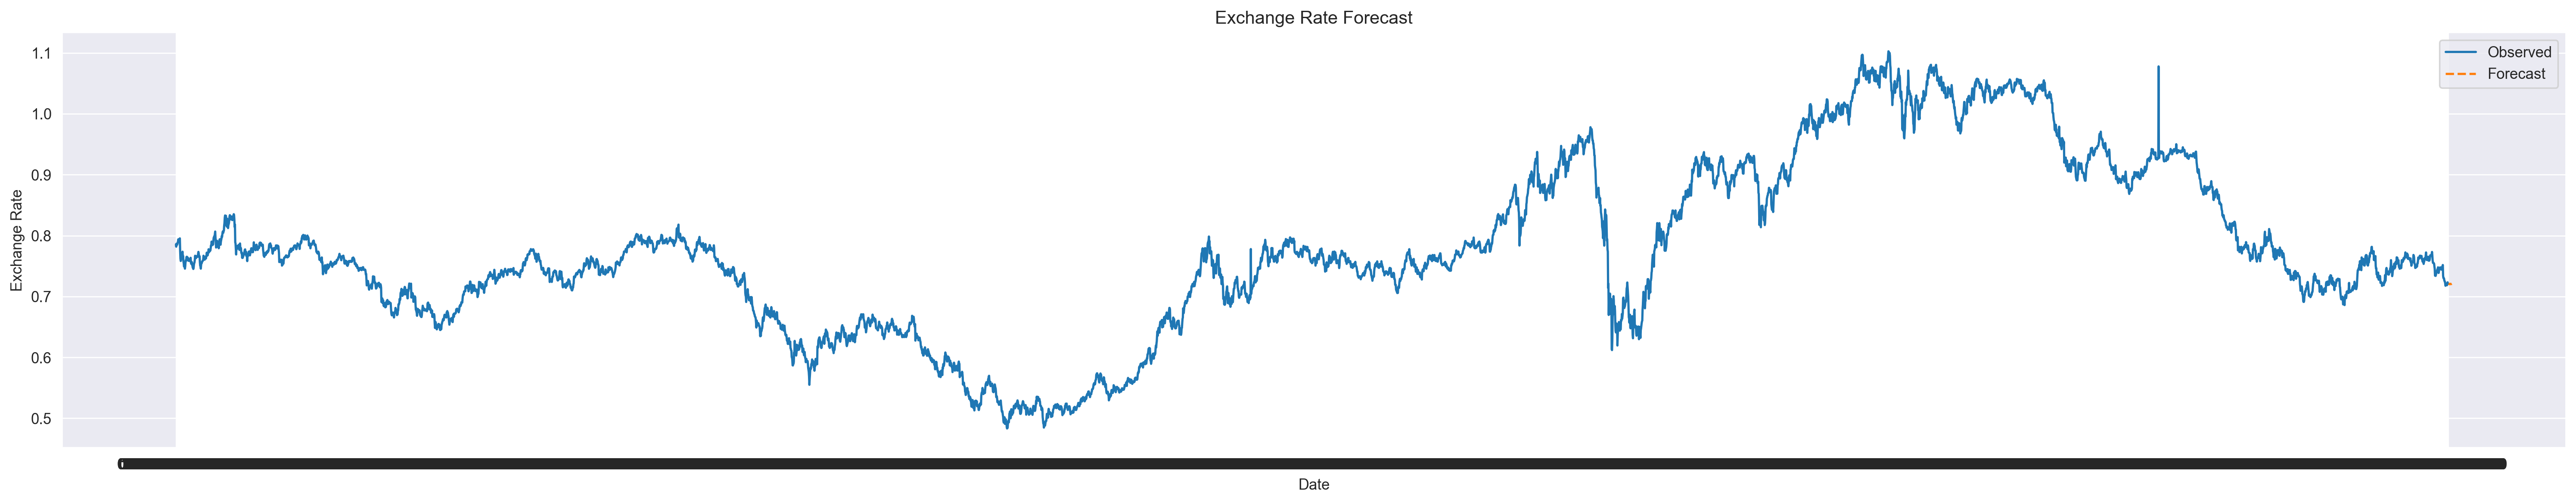

In [28]:
forecast = hw_fit.forecast(steps=12)

# Plot the data and forecast
plt.plot(df.index, df['Ex_rate'], label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.title('Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()